In [ ]:
!pip install adjustText

In [257]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import scipy
import statsmodels
from statsmodels.formula.api import ols
from sklearn.neighbors import LocalOutlierFactor

In [259]:
beers = pd.read_csv("https://gist.githubusercontent.com/sikor272/7ba233a7e855f9a3ff8dca841f6591e4/raw/4777e8129b388aed30d14eccf68356a86b175492/beers.csv")

**WSZYSKIE PIWA**




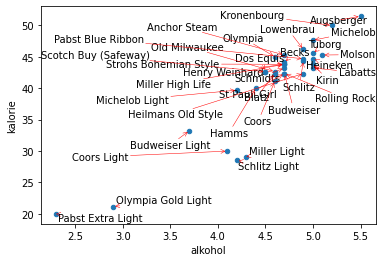

In [260]:
beers.plot.scatter(x='alkohol', y='kalorie')
texts = []
for row in np.array(beers):
    texts.append(plt.text(x=row[2], y=row[1], s=row[0]))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=0.5))
plt.show()

In [261]:
print('Współczynnik korelacji: ', np.corrcoef(np.array(beers['alkohol']), np.array(beers['kalorie']))[1, 0])

Współczynnik korelacji:  0.9144565338418085


In [262]:
linearBeers = linear_model.LinearRegression()
linearBeers.fit(np.array(beers['alkohol']).reshape(-1, 1), np.array(beers['kalorie']))
print('Kalorie = (', linearBeers.coef_[0], ') * Alkohol + (', linearBeers.intercept_, ')')

Kalorie = ( 10.898342297297539 ) * Alkohol + ( -8.797497962949983 )


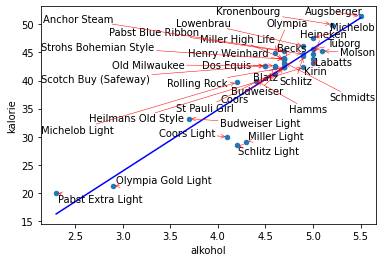

In [263]:
minA, maxA = min(beers['alkohol']), max(beers['alkohol'])

beers.plot.scatter(x='alkohol', y='kalorie')
texts = []

for row in np.array(beers):
    texts.append(plt.text(x=row[2], y=row[1], s=row[0]))
plt.plot([minA, maxA],
         [minA * linearBeers.coef_[0] + linearBeers.intercept_, maxA * linearBeers.coef_[0] + linearBeers.intercept_],
         color='blue')
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=0.5))
plt.show()

In [264]:
beers['reszty'] = [(row[1] - (row[2] * linearBeers.coef_[0] + linearBeers.intercept_)) for row in np.array(beers)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0aac5f290>]],
      dtype=object)

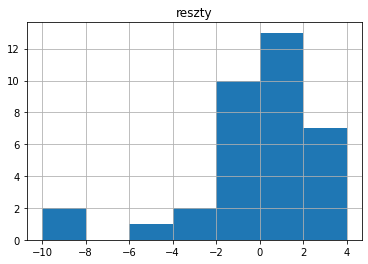

In [265]:
beers.hist(column='reszty', bins=range(-10, 6, 2))

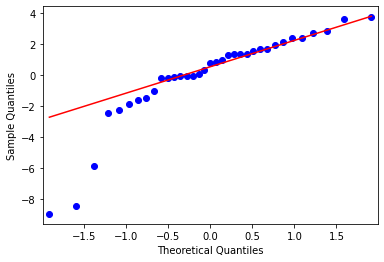

In [266]:
sm.qqplot(beers['reszty'], line='q')
plt.show()

In [267]:
scipy.stats.shapiro(beers['reszty'])

(0.831616997718811, 9.06768545974046e-05)

In [268]:
statsmodels.stats.stattools.durbin_watson(beers['reszty'])

2.6965053247791007

In [269]:
model = ols('kalorie ~ alkohol', data=beers).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                kalorie   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     168.5
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           1.62e-14
Time:                        15:24:09   Log-Likelihood:                -86.518
No. Observations:                  35   AIC:                             177.0
Df Residuals:                      33   BIC:                             180.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.7975      3.875     -2.270      0.0

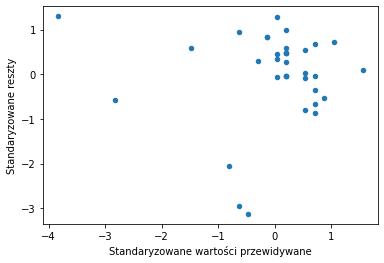

In [270]:
beers['przewidywana'] = [(row[2] * linearBeers.coef_[0] + linearBeers.intercept_) for row in np.array(beers)]
beers['reszty_sandaryzowane'] = [(row[3] - np.mean(beers['reszty']))/np.std(beers['reszty'])  for row in np.array(beers)]
beers['przewidywana_standaryzowane'] = [(row[4] - np.mean(beers['przewidywana']))/np.std(beers['przewidywana'])  for row in np.array(beers)]
beers.plot.scatter(x='przewidywana_standaryzowane', y='reszty_sandaryzowane')
plt.xlabel("Standaryzowane wartości przewidywane")
plt.ylabel("Standaryzowane reszty")
plt.show()

In [271]:
beers['outlier'] = -(LocalOutlierFactor().fit_predict(np.array(beers['alkohol']).reshape(-1, 1), np.array(beers['kalorie'])))

In [272]:
beers.loc[beers['outlier'] == 1]

,marka,kalorie,alkohol,reszty,przewidywana,reszty_sandaryzowane,przewidywana_standaryzowane,outlier
0,Budweiser Light,33.216318,3.7,1.689949,31.526369,0.589596,-1.475927,1
1,Coors Light,29.982871,4.1,-5.902834,35.885705,-2.059405,-0.802866,1
4,Olympia Gold Light,21.164380,2.9,-1.643315,22.807695,-0.573326,-2.822050,1
5,Pabst Extra Light,19.988581,2.3,3.719891,16.268689,1.297811,-3.831642,1
8,Augsberger,51.441200,5.5,0.297816,51.143385,0.103903,1.552849,1


**PIWA LIGHT**

In [273]:
beers['znacznik'] = [1 if row[2] <= 4.3 else 0 for row in np.array(beers)]

In [274]:
light = beers.loc[beers['znacznik'] == 1][['marka', 'kalorie', 'alkohol']]

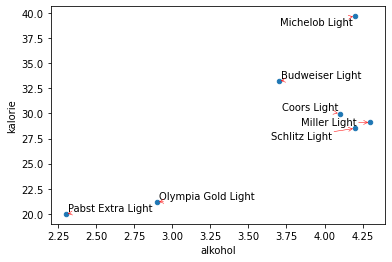

In [275]:
light.plot.scatter(x='alkohol', y='kalorie')
texts = []
for row in np.array(light):
    texts.append(plt.text(x=row[2], y=row[1], s=row[0]))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=0.5))
plt.show()

In [276]:
print('Współczynnik korelacji: ', np.corrcoef(np.array(light['alkohol']), np.array(light['kalorie']))[1, 0])

Współczynnik korelacji:  0.7732282193384542


In [277]:
linearBeersLight = linear_model.LinearRegression()
linearBeersLight.fit(np.array(light['alkohol']).reshape(-1, 1), np.array(light['kalorie']))
print('Kalorie = (', linearBeersLight.coef_[0], ') * Alkohol + (', linearBeersLight.intercept_, ')')

Kalorie = ( 6.750386743017873 ) * Alkohol + ( 4.023509344418326 )


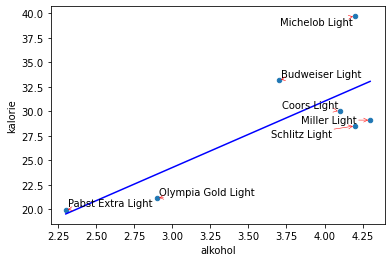

In [278]:
minA, maxA = min(light['alkohol']), max(light['alkohol'])

light.plot.scatter(x='alkohol', y='kalorie')
texts = []

for row in np.array(light):
    texts.append(plt.text(x=row[2], y=row[1], s=row[0]))
plt.plot([minA, maxA],
         [minA * linearBeersLight.coef_[0] + linearBeersLight.intercept_, maxA * linearBeersLight.coef_[0] + linearBeersLight.intercept_],
         color='blue')
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=0.5))
plt.show()

In [279]:
light['reszty'] = [(row[1] - (row[2] * linearBeersLight.coef_[0] + linearBeersLight.intercept_)) for row in np.array(light)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0aa5abb50>]],
      dtype=object)

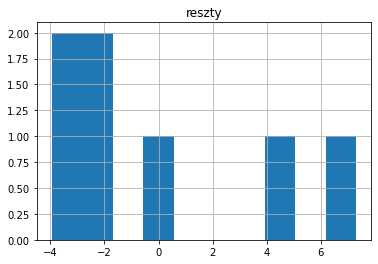

In [280]:
light.hist(column='reszty')

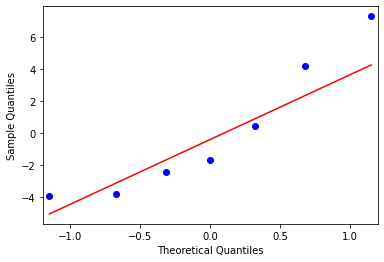

In [281]:
sm.qqplot(light['reszty'], line='q')
plt.show()

In [282]:
scipy.stats.shapiro(light['reszty'])

(0.8791101574897766, 0.22252728044986725)

In [283]:
statsmodels.stats.stattools.durbin_watson(light['reszty'])

2.45956478866233

In [284]:
model = ols('kalorie ~ alkohol', data=light).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                kalorie   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     7.434
Date:                Tue, 20 Apr 2021   Prob (F-statistic):             0.0414
Time:                        15:24:49   Log-Likelihood:                -19.598
No. Observations:                   7   AIC:                             43.20
Df Residuals:                       5   BIC:                             43.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0235      9.262      0.434      0.6

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


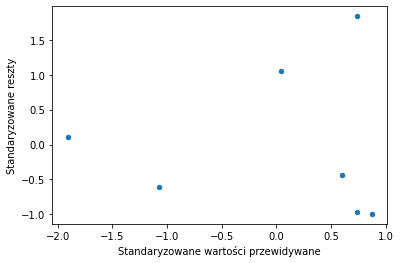

In [285]:
light['przewidywana'] = [(row[2] * linearBeersLight.coef_[0] + linearBeersLight.intercept_) for row in np.array(light)]
light['reszty_sandaryzowane'] = [(row[3] - np.mean(light['reszty']))/np.std(light['reszty'])  for row in np.array(light)]
light['przewidywana_standaryzowane'] = [(row[4] - np.mean(light['przewidywana']))/np.std(light['przewidywana'])  for row in np.array(light)]
light.plot.scatter(x='przewidywana_standaryzowane', y='reszty_sandaryzowane')
plt.xlabel("Standaryzowane wartości przewidywane")
plt.ylabel("Standaryzowane reszty")
plt.show()

In [288]:
light['outlier'] = -(LocalOutlierFactor().fit_predict(np.array(light['alkohol']).reshape(-1, 1), np.array(light['kalorie'])))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_lof.py:259: UserWarning: n_neighbors (20) is greater than the total number of samples (7). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))


**Piwa normalne**

In [286]:
normal = beers.loc[beers['znacznik'] == 0][['marka', 'kalorie', 'alkohol']]

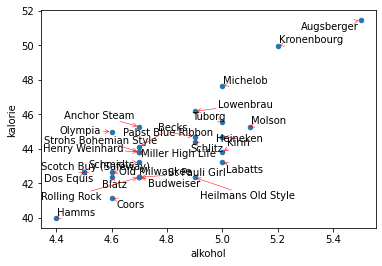

In [289]:
normal.plot.scatter(x='alkohol', y='kalorie')
texts = []
for row in np.array(normal):
    texts.append(plt.text(x=row[2], y=row[1], s=row[0]))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=0.5))
plt.show()

In [290]:
print('Współczynnik korelacji: ', np.corrcoef(np.array(normal['alkohol']), np.array(normal['kalorie']))[1, 0])

Współczynnik korelacji:  0.8184403409880893


In [291]:
linearBeersNormal = linear_model.LinearRegression()
linearBeersNormal.fit(np.array(normal['alkohol']).reshape(-1, 1), np.array(normal['kalorie']))
print('Kalorie = (', linearBeersNormal.coef_[0], ') * Alkohol + (', linearBeersNormal.intercept_, ')')

Kalorie = ( 8.292124164920502 ) * Alkohol + ( 4.3236358012686225 )


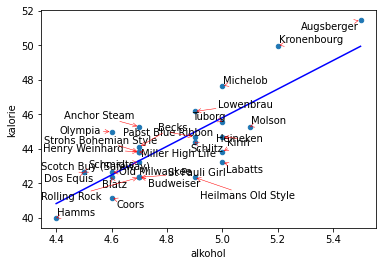

In [292]:
minA, maxA = min(normal['alkohol']), max(normal['alkohol'])

normal.plot.scatter(x='alkohol', y='kalorie')
texts = []

for row in np.array(normal):
    texts.append(plt.text(x=row[2], y=row[1], s=row[0]))
plt.plot([minA, maxA],
         [minA * linearBeersNormal.coef_[0] + linearBeersNormal.intercept_, maxA * linearBeersNormal.coef_[0] + linearBeersNormal.intercept_],
         color='blue')
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=0.5))
plt.show()

In [294]:
normal['reszty'] = [(row[1] - (row[2] * linearBeersNormal.coef_[0] + linearBeersNormal.intercept_)) for row in np.array(normal)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0abe7ff50>]],
      dtype=object)

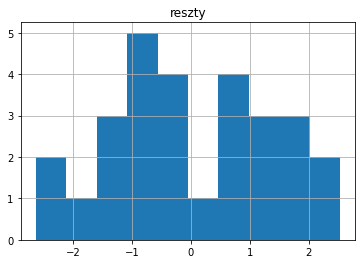

In [295]:
normal.hist(column='reszty')

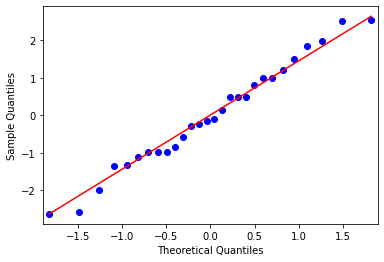

In [296]:
sm.qqplot(normal['reszty'], line='q')
plt.show()

In [297]:
scipy.stats.shapiro(normal['reszty'])

(0.9769742488861084, 0.7728092670440674)

In [298]:
statsmodels.stats.stattools.durbin_watson(normal['reszty'])

2.1721047903770754

In [299]:
model = ols('kalorie ~ alkohol', data=normal).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                kalorie   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     52.75
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           1.03e-07
Time:                        15:26:10   Log-Likelihood:                -48.715
No. Observations:                  28   AIC:                             101.4
Df Residuals:                      26   BIC:                             104.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3236      5.491      0.787      0.4

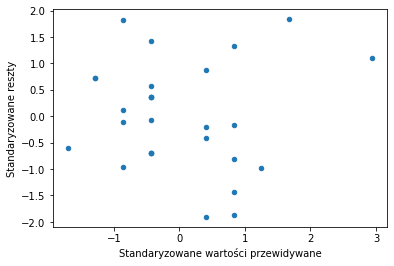

In [300]:
normal['przewidywana'] = [(row[2] * linearBeersNormal.coef_[0] + linearBeersNormal.intercept_) for row in np.array(normal)]
normal['reszty_sandaryzowane'] = [(row[3] - np.mean(normal['reszty']))/np.std(normal['reszty'])  for row in np.array(normal)]
normal['przewidywana_standaryzowane'] = [(row[4] - np.mean(normal['przewidywana']))/np.std(normal['przewidywana'])  for row in np.array(normal)]
normal.plot.scatter(x='przewidywana_standaryzowane', y='reszty_sandaryzowane')
plt.xlabel("Standaryzowane wartości przewidywane")
plt.ylabel("Standaryzowane reszty")
plt.show()

In [301]:
normal['outlier'] = -(LocalOutlierFactor().fit_predict(np.array(normal['alkohol']).reshape(-1, 1), np.array(normal['kalorie'])))

In [302]:
normal.loc[normal['outlier'] == 1]

,marka,kalorie,alkohol,reszty,przewidywana,reszty_sandaryzowane,przewidywana_standaryzowane,outlier
8,Augsberger,51.4412,5.5,1.510881,49.930319,1.096153,2.941407,1


**TESTOWANIE**

In [303]:
for i in np.arange(2, 6.01, 0.2):
  i = round(i, 1)
  print('Przewidywana kalorycznosc dla piwa', i, '% wynosi:', i * linearBeers.coef_[0] + linearBeers.intercept_, 'kalorii')

Przewidywana kalorycznosc dla piwa 2.0 % wynosi: 12.999186631645095 kalorii
Przewidywana kalorycznosc dla piwa 2.2 % wynosi: 15.178855091104605 kalorii
Przewidywana kalorycznosc dla piwa 2.4 % wynosi: 17.35852355056411 kalorii
Przewidywana kalorycznosc dla piwa 2.6 % wynosi: 19.538192010023618 kalorii
Przewidywana kalorycznosc dla piwa 2.8 % wynosi: 21.717860469483124 kalorii
Przewidywana kalorycznosc dla piwa 3.0 % wynosi: 23.897528928942634 kalorii
Przewidywana kalorycznosc dla piwa 3.2 % wynosi: 26.07719738840214 kalorii
Przewidywana kalorycznosc dla piwa 3.4 % wynosi: 28.256865847861647 kalorii
Przewidywana kalorycznosc dla piwa 3.6 % wynosi: 30.43653430732116 kalorii
Przewidywana kalorycznosc dla piwa 3.8 % wynosi: 32.61620276678067 kalorii
Przewidywana kalorycznosc dla piwa 4.0 % wynosi: 34.79587122624017 kalorii
Przewidywana kalorycznosc dla piwa 4.2 % wynosi: 36.97553968569968 kalorii
Przewidywana kalorycznosc dla piwa 4.4 % wynosi: 39.15520814515919 kalorii
Przewidywana kalory